In [111]:
import yfinance as yf
import pandas as pd
import numpy as np
import statistics
import csv
from datetime import datetime, timedelta
import statistics
import mplfinance as mpf
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [134]:
Starttime = "2023-05-16"
Endtime = "2023-05-16"
Interval = "15m"

In [136]:
# print(data.loc[data.index[1] + timedelta(minutes=300)]['Datetime'])
reader = pd.read_csv('Nifty_50_companies_list.csv')
reader = pd.read_excel("high_volatile_stock_large_cap.xlsx")
csv_file = reader.to_csv("high_volatile_stock_large_cap.csv")
reader = pd.read_csv('high_volatile_stockcsv.csv')
print(reader.head)
# # print(reader['Symbol'][1])
for i in reader['Symbol']:
    print(str(i) + ".NS")

<bound method NDFrame.head of     Unnamed: 0   0  Sr.                                         Stock Name  \
0            0   1   64                                Repro India Limited   
1            1   2   40                      Mazagon Dock Shipbuilders Ltd   
2            2   3   12                        Astral Poly Technik Limited   
3            3   4   54                           Aurobindo Pharma Limited   
4            4   5   61                                    Cochin Shipyard   
5            5   6   71          Garden Reach Shipbuilders & Engineers Ltd   
6            6   7   37                            Sonata Software Limited   
7            7   8   55                                     PB Fintech Ltd   
8            8   9   27                                Bharat Dynamics Ltd   
9            9  10    5                          Hindustan Aeronautics Ltd   
10          10  11   53  Gujarat Narmada Valley Fertilizers And Chemica...   
11          11  12   47           

In [114]:
# # import yfinance as yf

# # Define the stock symbol and start/end dates for the data
# symbol = "RELIANCE.NS"
# start_date = "2023-05-01"
# end_date = "2023-05-12"


# # Fetch the data using yfinance
# data = yf.download(symbol, start=start_date, end=end_date,int(int(int(int(int(int(int(int(int(int(int(minutes=int(Interval[0:2])[0:2])[0:2])[0:2])[0:2])[0:2])[0:2])[0:2])[0:2])[0:2])[0:2])[0:2])=Interval)

# # Extract the volume column
# volume = data["Volume"]

# print(volume)
# mpf.plot(data, type='candle', volume=True, mav=(10, 20), figscale=1.5, style='yahoo')
# mpf.show()

In [115]:
import pandas as pd
import numpy as np

def calculate_volatility(data, period=20):
    # Calculate average volume over period
    avg_volume = data['Volume'].rolling(window=period).mean()

    # Calculate daily returns based on closing price
    daily_returns = data['Close'].pct_change()

    # Calculate daily volatility based on daily returns
    daily_volatility = daily_returns.rolling(window=period).std()

    # Calculate continuous volatility based on average volume and daily volatility
    cont_volatility = daily_volatility * np.sqrt(avg_volume)

    return cont_volatility

volatility = calculate_volatility(data,period=5)
volatility = volatility[volatility.notna()]
print(data['Volume'])
print(volatility)

Datetime
2023-04-17 09:15:00     871690
2023-04-17 09:30:00     854912
2023-04-17 09:45:00     379121
2023-04-17 10:00:00     284698
2023-04-17 10:15:00     262486
2023-04-17 10:30:00     223023
2023-04-17 10:45:00     182228
2023-04-17 11:00:00      98403
2023-04-17 11:15:00      97900
2023-04-17 11:30:00     141411
2023-04-17 11:45:00      99793
2023-04-17 12:00:00     132443
2023-04-17 12:15:00     138763
2023-04-17 12:30:00     168338
2023-04-17 12:45:00      81248
2023-04-17 13:00:00      95592
2023-04-17 13:15:00      74115
2023-04-17 13:30:00     114966
2023-04-17 13:45:00      78032
2023-04-17 14:00:00     259367
2023-04-17 14:15:00     168690
2023-04-17 14:30:00     178417
2023-04-17 14:45:00     117247
2023-04-17 15:00:00     334058
2023-04-17 15:15:00     474827
2023-04-18 09:15:00     689560
2023-04-18 09:30:00     188833
2023-04-18 09:45:00     199980
2023-04-18 10:00:00     127757
2023-04-18 10:15:00     128572
2023-04-18 10:30:00     110908
2023-04-18 10:45:00      69768

In [116]:
def calculate_volatility(data, period):
    # Calculate average daily volume over the period
    avg_volume = data['Volume'].rolling(window=period, min_periods=1).mean()
    
    # Calculate daily volume returns
    volume_returns = np.log(avg_volume / avg_volume.shift(1))
    
    # Calculate the standard deviation of the daily volume returns
    volatility = volume_returns.rolling(window=period, min_periods=1).std()
    
    return volatility
volatility = calculate_volatility(data,10)
volatility = volatility[volatility.notna()]
print(volatility)

Datetime
2023-04-17 09:45:00    0.139506
2023-04-17 10:00:00    0.103207
2023-04-17 10:15:00    0.084338
2023-04-17 10:30:00    0.073730
2023-04-17 10:45:00    0.066854
2023-04-17 11:00:00    0.061235
2023-04-17 11:15:00    0.057432
2023-04-17 11:30:00    0.055976
2023-04-17 11:45:00    0.071623
2023-04-17 12:00:00    0.085000
2023-04-17 12:15:00    0.082779
2023-04-17 12:30:00    0.085454
2023-04-17 12:45:00    0.085350
2023-04-17 13:00:00    0.085513
2023-04-17 13:15:00    0.085580
2023-04-17 13:30:00    0.097712
2023-04-17 13:45:00    0.102955
2023-04-17 14:00:00    0.123254
2023-04-17 14:15:00    0.118374
2023-04-17 14:30:00    0.081869
2023-04-17 14:45:00    0.073731
2023-04-17 15:00:00    0.082993
2023-04-17 15:15:00    0.099907
2023-04-18 09:15:00    0.113707
2023-04-18 09:30:00    0.099459
2023-04-18 09:45:00    0.098252
2023-04-18 10:00:00    0.094669
2023-04-18 10:15:00    0.104009
2023-04-18 10:30:00    0.108366
2023-04-18 10:45:00    0.113609
2023-04-18 11:00:00    0.113125

In [117]:
data['Log returns'] = np.log(data['Close']/data['Close'].shift())
data['Log returns'].std()
volatility = data['Log returns'].std()*252**.5
print(volatility)

str_vol = str(round(volatility, 4)*100)

fig, ax = plt.subplots()
data['Log returns'].hist(ax=ax, bins=50, alpha=0.6, color='b')
ax.set_xlabel("Log return")
ax.set_ylabel("Freq of log return")
ax.set_title("volatility: " + str_vol + "%")

0.03594135243606001


NameError: name 'plt' is not defined

ValueError: x and y must be the same size

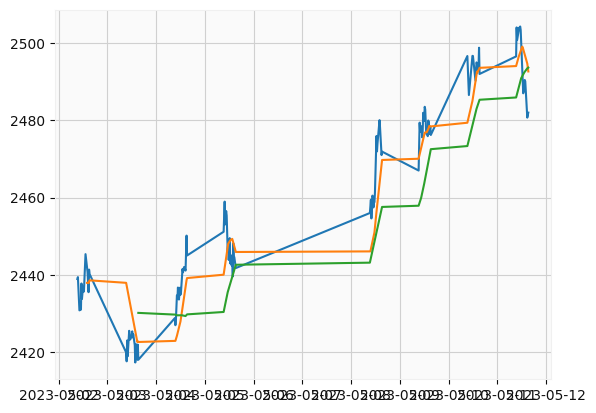

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load stock data into pandas dataframe
df = data

# calculate moving averages of closing prices
short_ma = df['Close'].rolling(window=20).mean()
long_ma = df['Close'].rolling(window=50).mean()

# calculate the difference between short and long moving averages
ma_diff = short_ma - long_ma

# identify local support and resistance levels
support = []
resistance = []
for i in range(1, len(ma_diff)-1):
    if ma_diff[i] > 0 and ma_diff[i-1] < 0:
        support.append(short_ma[i])
    elif ma_diff[i] < 0 and ma_diff[i-1] > 0:
        resistance.append(short_ma[i])

# plot stock prices and local support/resistance levels
plt.plot(df.index,df['Close'])
plt.plot(short_ma, label='20-day MA')
plt.plot(long_ma, label='50-day MA')
plt.scatter(df.index, support, color='green', marker='o', label='Support')
plt.scatter(df.index, resistance, color='red', marker='o', label='Resistance')
plt.legend()
plt.show()


In [ ]:
print(minutes=int(Interval[0:2]))

15


In [130]:

import pandas as pd
import ta
reader = pd.read_csv("high_volatile_stockcsv.csv")
# reader = pd.read_csv('Nifty_50_companies_list.csv')
for j in reader['Symbol']:
    balance = 100000
    cp = str(j) + ".NS"
    print(str(cp))
    data = yf.download(cp,Starttime,Endtime,interval=Interval)

    # assume dataframe named data is already defined

    # calculate volatility and add new column to data
    data['Volatility'] = data['Close'].rolling(window=7).std() * np.sqrt(7)
    print(data['Volatility'])
    # calculate EMA of 8 and 5 and add new columns to data
    data['EMA_8'] = data['Close'].ewm(span=8).mean()
    data['EMA_5'] = data['Close'].ewm(span=5).mean()
    # print(data)
    # loop through index of data and check for EMA8 crossing EMA5
    print("step 1 done")
    # print(data.loc[data.index[1]]['EMA_8'])
    pur = 0
    quantity =0
    quantity1 = 0
    for i in range(4, len(data)-1):
        # print(i)
        # print(data[data.index[i]]['EMA8'])
        if(data.loc[data.index[i]]['EMA_8'] > data.loc[data.index[i]]['EMA_5'] and data.loc[data.index[i+1]]['EMA_8'] < data.loc[data.index[i+1]]['EMA_5'] and pur == 0 and data.loc[data.index[i]]['Volatility'] > 20):
            print("before purchase at time " + str(data.index[i]) + " balance1 = " + str(balance))
            quantity = balance/data.loc[data.index[i]]['Open']
            balance = balance - quantity*data.loc[data.index[i]]['Open']
            print("quantity = " + str(quantity))
            print("after purchase at time " + str(data.index[i]) + " balance1 = " + str(balance))
            pur = 1

        elif(data.loc[data.index[i]]['EMA_8'] < data.loc[data.index[i]]['EMA_5'] and data.loc[data.index[i+1]]['EMA_8'] > data.loc[data.index[i+1]]['EMA_5'] and pur == 0 and data.loc[data.index[i]]['Volatility'] > 20):
            print("before purchase at time " + str(data.index[i]) + " balance2 = " + str(balance))
            quantity = balance/data.loc[data.index[i]]['Open']
            balance = balance + quantity*data.loc[data.index[i]]['Open']
            print("quantity = " + str(quantity))
            print("after purchase at time " + str(data.index[i]) + " balance2 = " + str(balance))
            pur = 1
        # elif(data.loc[data.index[i]]['EMA_8'] > data.loc[data.index[i]]['EMA_5'] and data.loc[data.index[i+1]]['EMA_8'] > data.loc[data.index[i+1]]['EMA_5'] and pur == 0 and data.loc[data.index[i]]['Volatility'] > 20):
        #     quantity1 = balance/data.loc[data.index[i]]['Open']
        #     balance = balance + quantity*data.loc[data.index[i]]['Open']
        #     print("after purchase at time "+ str(data.index[i]) + "balance2 = " + str(balance))
        #     pur = 1





        elif(data.loc[data.index[i]]['EMA_8'] < data.loc[data.index[i]]['EMA_5'] and data.loc[data.index[i+1]]['EMA_8'] > data.loc[data.index[i+1]]['EMA_5'] and pur == 1):
            print("before sell at time " + str(data.index[i]) + " balance1 = " + str(balance))
            balance = balance + quantity*data.loc[data.index[i]]['Close']
            print("quantity = " + str(quantity))
            print("after sell at time " + str(data.index[i]) + " balance1 = " + str(balance))
            quantity = 0
            pur = 0
        elif(data.loc[data.index[i]]['EMA_8'] > data.loc[data.index[i]]['EMA_5'] and data.loc[data.index[i+1]]['EMA_8'] < data.loc[data.index[i+1]]['EMA_5'] and pur == 1):
            print("before sell at time " + str(data.index[i]) + " balance2 = " + str(balance))
            balance = balance - quantity*data.loc[data.index[i]]['Close']
            print("quantity = " + str(quantity))
            print("after sell at time " + str(data.index[i]) + " balance2 = " + str(balance))
            quantity = 0
            pur = 0
        # elif(data.loc[data.index[i]]['EMA_8'] > data.loc[data.index[i]]['EMA_5'] and data.loc[data.index[i+1]]['EMA_8'] > data.loc[data.index[i+1]]['EMA_5'] and pur == 1):
        #     balance = balance - quantity1*data.loc[data.index[i]]['Close']
        #     print("after sell 2 = " + str(balance))
        #     pur = 0
    if(pur == 1):
        if(quantity1>0):
            balance = balance - quantity1*data.loc[data.index[i]]['Close']
        elif(quantity>0):
            balance = balance + quantity*data.loc[data.index[i]]['Close']
    print(balance)

REPRO.NS
[*********************100%***********************]  1 of 1 completed
Datetime
2023-04-17 09:15:00          NaN
2023-04-17 09:30:00          NaN
2023-04-17 09:45:00          NaN
2023-04-17 10:15:00          NaN
2023-04-17 10:30:00          NaN
2023-04-17 10:45:00          NaN
2023-04-17 11:00:00     3.621930
2023-04-17 11:15:00     3.706984
2023-04-17 11:30:00     3.450846
2023-04-17 11:45:00     2.410055
2023-04-17 12:00:00     2.779547
2023-04-17 12:30:00     3.152522
2023-04-17 13:00:00     4.519410
2023-04-17 13:15:00     5.427022
2023-04-17 13:30:00     5.524417
2023-04-17 13:45:00     4.721058
2023-04-17 14:00:00     3.187609
2023-04-17 14:30:00     2.363970
2023-04-17 14:45:00     1.462036
2023-04-17 15:00:00     1.448574
2023-04-17 15:15:00     1.448568
2023-04-18 09:15:00     6.787802
2023-04-18 09:30:00    16.258986
2023-04-18 09:45:00    20.254247
2023-04-18 10:00:00    20.356928
2023-04-18 10:15:00    19.807512
2023-04-18 10:30:00    16.022721
2023-04-18 10:45:00   

KeyboardInterrupt: 

In [135]:

import pandas as pd
import ta
reader = pd.read_csv("high_volatile_stockcsv.csv")
# reader = pd.read_csv('Nifty_50_companies_list.csv')
for j in reader['Symbol']:
    balance = 100000
    cp = str(j) + ".NS"
    print(str(cp))
    data = yf.download(cp,Starttime,Endtime,interval=Interval)

    # assume dataframe named data is already defined

    # calculate volatility and add new column to data
    data['Volatility'] = data['Close'].rolling(window=7).std() * np.sqrt(7)
    # print(data['Volatility'])
    # calculate EMA of 8 and 5 and add new columns to data
    data['EMA_8'] = data['Close'].ewm(span=8).mean()
    data['EMA_5'] = data['Close'].ewm(span=5).mean()
    # print(data)
    # loop through index of data and check for EMA8 crossing EMA5
    print("step 1 done")
    # print(data.loc[data.index[1]]['EMA_8'])
    pur = 0
    quantity =0
    quantity1 = 0
    for i in range(4, len(data)-1):
        # print(i)
        # print(data[data.index[i]]['EMA8'])
        if(data.loc[data.index[i]]['EMA_8'] > data.loc[data.index[i]]['EMA_5'] and data.loc[data.index[i+1]]['EMA_8'] < data.loc[data.index[i+1]]['EMA_5'] and pur == 0 and data.loc[data.index[i]]['Volatility'] > 0):
            print("before purchase at time " + str(data.index[i]) + " balance1 = " + str(balance))
            quantity = balance/data.loc[data.index[i]]['Open']
            balance = balance - quantity*data.loc[data.index[i]]['Open']
            print("quantity = " + str(quantity))
            print("after purchase at time " + str(data.index[i]) + " balance1 = " + str(balance))
            pur = 1

        # elif(data.loc[data.index[i]]['EMA_8'] < data.loc[data.index[i]]['EMA_5'] and data.loc[data.index[i+1]]['EMA_8'] > data.loc[data.index[i+1]]['EMA_5'] and pur == 0 and data.loc[data.index[i]]['Volatility'] > 0):
        #     print("before purchase at time " + str(data.index[i]) + " balance2 = " + str(balance))
        #     quantity = balance/data.loc[data.index[i]]['Open']
        #     balance = balance + quantity*data.loc[data.index[i]]['Open']
        #     print("quantity = " + str(quantity))
        #     print("after purchase at time " + str(data.index[i]) + " balance2 = " + str(balance))
        #     pur = 1
        # elif(data.loc[data.index[i]]['EMA_8'] > data.loc[data.index[i]]['EMA_5'] and data.loc[data.index[i+1]]['EMA_8'] > data.loc[data.index[i+1]]['EMA_5'] and pur == 0 and data.loc[data.index[i]]['Volatility'] > 20):
        #     quantity1 = balance/data.loc[data.index[i]]['Open']
        #     balance = balance + quantity*data.loc[data.index[i]]['Open']
        #     print("after purchase at time "+ str(data.index[i]) + "balance2 = " + str(balance))
        #     pur = 1





        elif(data.loc[data.index[i]]['EMA_8'] < data.loc[data.index[i]]['EMA_5'] and data.loc[data.index[i+1]]['EMA_8'] > data.loc[data.index[i+1]]['EMA_5'] and pur == 1):
            print("before sell at time " + str(data.index[i]) + " balance1 = " + str(balance))
            balance = balance + quantity*data.loc[data.index[i]]['Close']
            print("quantity = " + str(quantity))
            print("after sell at time " + str(data.index[i]) + " balance1 = " + str(balance))
            quantity = 0
            pur = 0
        # elif(data.loc[data.index[i]]['EMA_8'] > data.loc[data.index[i]]['EMA_5'] and data.loc[data.index[i+1]]['EMA_8'] < data.loc[data.index[i+1]]['EMA_5'] and pur == 1):
        #     print("before sell at time " + str(data.index[i]) + " balance2 = " + str(balance))
        #     balance = balance - quantity*data.loc[data.index[i]]['Close']
        #     print("quantity = " + str(quantity))
        #     print("after sell at time " + str(data.index[i]) + " balance2 = " + str(balance))
        #     quantity = 0
        #     pur = 0
        # elif(data.loc[data.index[i]]['EMA_8'] > data.loc[data.index[i]]['EMA_5'] and data.loc[data.index[i+1]]['EMA_8'] > data.loc[data.index[i+1]]['EMA_5'] and pur == 1):
        #     balance = balance - quantity1*data.loc[data.index[i]]['Close']
        #     print("after sell 2 = " + str(balance))
        #     pur = 0
    if(pur == 1):
        if(quantity1>0):
            balance = balance - quantity1*data.loc[data.index[i]]['Close']
        elif(quantity>0):
            balance = balance + quantity*data.loc[data.index[i]]['Close']
    print(balance)

REPRO.NS
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- REPRO.NS: No data found for this date range, symbol may be delisted
step 1 done
100000
MAZDOCK.NS
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- MAZDOCK.NS: No data found for this date range, symbol may be delisted
step 1 done
100000
ASTRAL.NS
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ASTRAL.NS: No data found for this date range, symbol may be delisted
step 1 done
100000
AUROPHARMA.NS
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AUROPHARMA.NS: No data found for this date range, symbol may be delisted
step 1 done
100000
COCHINSHIP.NS
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- COCHINSHIP.NS: No data found for this date range, symbol may be delisted
step 1 done
100000
GRSE.NS
[*********************100%*****

In [61]:
data = yf.download("ADANIPOWER.NS",Starttime,Endtime,interval=Interval)

    # assume dataframe named data is already defined

# calculate volatility and add new column to data
data['Volatility'] = data['Close'].rolling(window=20).std() * np.sqrt(20)
print(data['Volatility'])

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ADANIPOWER.NS: No data found for this date range, symbol may be delisted
Series([], Name: Volatility, dtype: float64)


In [108]:

import pandas as pd
import ta
reader = pd.read_csv('Nifty_50_companies_list.csv')
for j in reader['Symbol']:
    balance = 100000
    cp = str(j) + ".NS"
    print(str(cp))
    data = yf.download(cp,Starttime,Endtime,interval=Interval)

    # assume dataframe named data is already defined

    # calculate volatility and add new column to data
    data['Volatility'] = data['Close'].rolling(window=7).std() * np.sqrt(7)
    # print(data['Volatility'])
    # calculate EMA of 8 and 5 and add new columns to data
    data['EMA_8'] = data['Close'].ewm(span=8).mean()
    data['EMA_5'] = data['Close'].ewm(span=5).mean()
    # print(data)
    # loop through index of data and check for EMA8 crossing EMA5
    print("step 1 done")
    # print(data.loc[data.index[1]]['EMA_8'])
    pur = 0
    quantity =0
    quantity1 = 0
    flag1 =0
    flag2 = 0
    for i in range(2, len(data)-1):
        # print(i)
        # print(data[data.index[i]]['EMA8'])
        if(data.loc[data.index[i]]['EMA_8'] > data.loc[data.index[i]]['EMA_5'] and data.loc[data.index[i+1]]['EMA_8'] < data.loc[data.index[i+1]]['EMA_5'] and pur == 0 and data.loc[data.index[i-1]]['Volatility'] > 20):
            print("before purchase at time " + str(data.index[i]) + " balance1 = " + str(balance))
            quantity = balance/data.loc[data.index[i]]['Open']
            balance = balance - quantity*data.loc[data.index[i]]['Open']
            print("quantity = " + str(quantity))
            print("after purchase at time " + str(data.index[i]) + " balance1 = " + str(balance))
            pur = 1
            flag1 = 1

        elif(data.loc[data.index[i]]['EMA_8'] < data.loc[data.index[i]]['EMA_5'] and data.loc[data.index[i+1]]['EMA_8'] > data.loc[data.index[i+1]]['EMA_5'] and pur == 0 and data.loc[data.index[i-1]]['Volatility'] > 20):
            print("before purchase at time " + str(data.index[i]) + " balance2 = " + str(balance))
            quantity = balance/data.loc[data.index[i]]['Open']
            balance = balance + quantity*data.loc[data.index[i]]['Open']
            print("quantity = " + str(quantity))
            print("after purchase at time " + str(data.index[i]) + " balance2 = " + str(balance))
            pur = 1
            flag2 = 1
        # elif(data.loc[data.index[i]]['EMA_8'] > data.loc[data.index[i]]['EMA_5'] and data.loc[data.index[i+1]]['EMA_8'] > data.loc[data.index[i+1]]['EMA_5'] and pur == 0 and data.loc[data.index[i]]['Volatility'] > 20):
        #     quantity1 = balance/data.loc[data.index[i]]['Open']
        #     balance = balance + quantity*data.loc[data.index[i]]['Open']
        #     print("after purchase at time "+ str(data.index[i]) + "balance2 = " + str(balance))
        #     pur = 1





        elif(data.loc[data.index[i]]['EMA_8'] < data.loc[data.index[i]]['EMA_5'] and data.loc[data.index[i+1]]['EMA_8'] > data.loc[data.index[i+1]]['EMA_5'] and pur == 1):
            print("before sell at time " + str(data.index[i]) + " balance1 = " + str(balance))
            balance = balance + quantity*data.loc[data.index[i]]['Close']
            print("quantity = " + str(quantity))
            print("after sell at time " + str(data.index[i]) + " balance1 = " + str(balance))
            quantity = 0
            pur = 0
            flag1 = 0
        elif(data.loc[data.index[i]]['EMA_8'] > data.loc[data.index[i]]['EMA_5'] and data.loc[data.index[i+1]]['EMA_8'] < data.loc[data.index[i+1]]['EMA_5'] and pur == 1):
            print("before sell at time " + str(data.index[i]) + " balance2 = " + str(balance))
            balance = balance - quantity*data.loc[data.index[i]]['Close']
            print("quantity = " + str(quantity))
            print("after sell at time " + str(data.index[i]) + " balance2 = " + str(balance))
            quantity = 0
            pur = 0
            flag2 = 0
        # elif(data.loc[data.index[i]]['EMA_8'] > data.loc[data.index[i]]['EMA_5'] and data.loc[data.index[i+1]]['EMA_8'] > data.loc[data.index[i+1]]['EMA_5'] and pur == 1):
        #     balance = balance - quantity1*data.loc[data.index[i]]['Close']
        #     print("after sell 2 = " + str(balance))
        #     pur = 0
    if(pur == 1):
        # if(quantity1>0):
        #     balance = balance - quantity1*data.loc[data.index[i]]['Close']
        if(quantity>0 and flag1 == 1):
            balance = balance + quantity*data.loc[data.index[i]]['Close']
        elif(quantity>0 and flag2 == 1):
            balance = balance - quantity*data.loc[data.index[i]]['Close']
    print(balance)

ADANIENT.NS
[*********************100%***********************]  1 of 1 completed
step 1 done
before purchase at time 2023-04-17 13:00:00 balance2 = 100000
quantity = 53.113796308591155
after purchase at time 2023-04-17 13:00:00 balance2 = 200000.0
before sell at time 2023-04-17 15:15:00 balance2 = 200000.0
quantity = 53.113796308591155
after sell at time 2023-04-17 15:15:00 balance2 = 100220.4235514042
before purchase at time 2023-04-19 09:45:00 balance2 = 100220.4235514042
quantity = 53.88194814591623
after purchase at time 2023-04-19 09:45:00 balance2 = 200440.8471028084
before sell at time 2023-04-19 11:15:00 balance2 = 200440.8471028084
quantity = 53.88194814591623
after sell at time 2023-04-19 11:15:00 balance2 = 100594.90046006381
before purchase at time 2023-04-24 11:45:00 balance1 = 100594.90046006381
quantity = 56.23439742458781
after purchase at time 2023-04-24 11:45:00 balance1 = 0.0
before sell at time 2023-04-24 12:00:00 balance1 = 0.0
quantity = 56.23439742458781
after se